In [1]:
from gensim.models.word2vec import Word2Vec
import ast
import pandas as pd

import logging

import requests
from bs4 import BeautifulSoup
import time
import urllib.request #
from selenium.webdriver import Chrome
import re     
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
import datetime as dt
import pandas as pd
#한글 형태소 분석기인 konlpy사용 
#이때 konlpy에는 hannanum, kommoran, kkma, twitter이 있는데 해당 분석에서는 kkma사용
from konlpy.tag import Kkma
from konlpy.tag import Mecab
from konlpy.tag import Twitter
#apply lambda사용

In [ ]:
# https://hyrama.com/?p=456
# pip install gensim

In [3]:
## 댓글 파일이 있는 유튜버만 만들어주세요.
df = pd.read_csv('푸드리스트.csv',encoding='cp949')
name_list = df['이름'].values
name_list

All_file = []
for name in name_list:
# 각 이름에 맞는 info 파일 불러와서 데이터프레임에 저장
    df = pd.read_csv(f'{name}/{name}token_result.csv')
    #df = pd.read_csv(f'C:\\Users\\acorn\\mywork\\pythonwork\\푸드\\{name}token_result.csv')
    All_file.append(df)
    
    dataCombine = pd.concat(All_file,axis =0, ignore_index = True)

    dataCombine.to_csv('testword.csv', index = False)
    


In [4]:
project=pd.read_csv('testword.csv')
project

,comment,noun,adj,verb
0,"Noodles, egg, sausage and kimchi. This is the ...",[],[],[]
1,Noddels egg sausage this is the perfect meal,[],[],[]
2,Fran is the queen of noodles! 😍🍜,[],[],[]
3,짜파게티에 계란도 좋지만 전 저 소세지랑 조합이 진짜 좋을 거 같아요 ㅠㅠ 진짜 맛...,"['짜파게티', '계란', '소세지', '조합', '소세지', '소리']","['좋다', '좋다', '같다', '맛있다', '좋다']",[]
4,짜파게티가 마르지 않고 촉촉해서 좋네요 후룩후루룩,"['짜파게티', '마르지', '후룩', '후루룩']","['촉촉하다', '좋다']",['않다']
...,...,...,...,...
63669,Your so beautiful❤,[],[],[]
63670,햄지님 300만 축하드려요~^^🎁🎉🎉🎊 햄지님^~장점중 최강은 모든 구독자분들과^^...,"['햄', '축하', '햄', '장점', '최강', '모든', '독자', '공유',...","['좋다', '건강하다']","['지니다', '드리다', '지니다', '해주다', '새다', '먹다', '보다',..."
63671,식용유 다써가서 삐귝삐슉 거리는거 ㄹㅇ현실적이여ㅠㅠㅠㅠ 사랑해,"['식용유', '삐귝삐슉', '거리', '현실', '사랑']",[],"['써다', '하다']"
63672,시작부터 한8분?까지 짜장이가 안보여서 다른방에서 자나?했는데 오른쪽 탁자아래 있었...,"['시작', '짜장', '안보', '방', '오른쪽', '탁자', '아래', '지금...",['있다'],"['하다', '하다', '보다', '하다']"


In [6]:

vec = []
vec2 = []
for i in range(len(project)):
    tm_ls = project['token'].iloc[i]
#     print(tm_ls)
    print(len(tm_ls))
    if len(tm_ls) == 0: #비어있는 리스트 삭제
        pass
    else:
        for j in range(len(tm_ls)): #비어있지 않은 리스트 중에서 단어가 한 음절인 것은 pass
            if len(tm_ls[j]) > 1:
                vec2.append(tm_ls[j])
                print(tm_ls[j])
            else:
                pass
    if len(vec2) == 0:
        pass
    else:
        vec.append(vec2)

KeyError: 'token'

In [60]:
tm_ls = project['token'].iloc[0]
tm_ls.split("'")[1]

'티'

In [19]:
len(project)

28998

In [61]:

vec3 =[]
for i in range(len(project['token'])):
    tm_ls=project['token'].iloc[i]
    for j in range(len(tm_ls)):
        j=+1
        vec3.append(tm_ls.split("'")[j])
        print(vec3)
        j=+2


['티']
['티', '티']
['티', '티', '티']
['티', '티', '티', '티']
['티', '티', '티', '티', '티']
['티', '티', '티', '티', '티', '다시']
['티', '티', '티', '티', '티', '다시', '다시']
['티', '티', '티', '티', '티', '다시', '다시', '다시']
['티', '티', '티', '티', '티', '다시', '다시', '다시', '다시']
['티', '티', '티', '티', '티', '다시', '다시', '다시', '다시', '다시']
['티', '티', '티', '티', '티', '다시', '다시', '다시', '다시', '다시', '다시']
['티', '티', '티', '티', '티', '다시', '다시', '다시', '다시', '다시', '다시', '다시']
['티', '티', '티', '티', '티', '다시', '다시', '다시', '다시', '다시', '다시', '다시', '다시']
['티', '티', '티', '티', '티', '다시', '다시', '다시', '다시', '다시', '다시', '다시', '다시', '다시']
['티', '티', '티', '티', '티', '다시', '다시', '다시', '다시', '다시', '다시', '다시', '다시', '다시', '다시']
['티', '티', '티', '티', '티', '다시', '다시', '다시', '다시', '다시', '다시', '다시', '다시', '다시', '다시', '다시']
['티', '티', '티', '티', '티', '다시', '다시', '다시', '다시', '다시', '다시', '다시', '다시', '다시', '다시', '다시', '누']
['티', '티', '티', '티', '티', '다시', '다시', '다시', '다시', '다시', '다시', '다시', '다시', '다시', '다시', '다시', '누', '누']
['티', '티', '티', '티', '티', '다시', '다시', '

IndexError: list index out of range

In [2]:

import requests
from bs4 import BeautifulSoup
import time
import urllib.request #
from selenium.webdriver import Chrome
import re     
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
import datetime as dt
import pandas as pd
#한글 형태소 분석기인 konlpy사용 
#이때 konlpy에는 hannanum, kommoran, kkma, twitter이 있는데 해당 분석에서는 kkma사용
from konlpy.tag import Kkma
from konlpy.tag import Mecab
from konlpy.tag import Twitter
#apply lambda사용

In [9]:
df = pd.read_csv('뷰티리스트2.csv',encoding='cp949')
name_list = df['이름'].values
name_list

All_file = []
for name in name_list:
# 각 이름에 맞는 info 파일 불러와서 데이터프레임에 저장
    df = pd.read_csv(f'{name}/result.csv')
    All_file.append(df)
    
    dataCombine = pd.concat(All_file,axis =0, ignore_index = True)

    dataCombine.to_csv('testword_notoken.csv', index = False)
    

OSError: Initializing from file failed

In [14]:
comment_data = pd.read_csv('testword_notoken.csv')
comment_data

,닉네임,댓글,좋아요수,날짜
0,보겸BK,이영상의 수익은 트와이스에게로 갑니다 ^_^*,889개,2020. 6. 2.
1,윤한샘,여러분은 지금 JYP가 할일을 대신하고 있는 보겸을 시청하고계십니다.,32개,2020. 6. 2.
2,전채호,보겸이 형이 트와이스 볼때마다 느끼는건데\n세상에서 가장 시원하게 웃는것 같아...,119개,2020. 6. 2.
3,벌집피자,보겸이형 좋다아 많은 분들은 리액션할때 트와이스를 아래로 띄우는데..\n여윽시 보겸...,14개,2020. 6. 2.
4,햇반,형인생에서 공로상을 2개를 받아야 한다면 하나는 jyp 두번째는 슈퍼셀 에게\n...,30개,2020. 6. 2.
5,냠냠,형 내가 형한테 할수있는말이 이것밖에 없어 미안혀ㅠ\n\n\n\n\nㅁㅊㄴ,7개,2020. 6. 2.
6,dhsnk,사나 외모 이번에 레전드다 ....,50개,2020. 6. 2.
7,정지예정지찬,스위트문이나 그렇게 열성적으로 하라 했으면 보겸이랑 결혼하고싶었구나^^,97개,2020. 6. 2.
8,윤보람,아니 이 정도면 트와이스가 오빠 알 거 같아 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,440개,2020. 6. 2.
9,나민재,보겸을 좋아하는 나의 첫사랑 너는 아마 이 영상을 보고있겠지 ㅎㅎ 난 너가 너무 좋...,94개,2020. 6. 2.


In [15]:
#이모티콘 제거
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

#분석에 어긋나는 불용어구 제외 (특수문자, 의성어)
han = re.compile(r'[ㄱ-ㅎㅏ-ㅣ!?~,".\n\r#\ufeff\u200d]')

In [16]:
comment_list = []
for i in range(len(comment_data)):
    comment_list.append(comment_data['댓글'].iloc[i])

In [17]:
comment_result = []

for i in comment_list:
    tokens = re.sub(emoji_pattern,"",i)
    tokens = re.sub(han,"",tokens)
    comment_result.append(tokens)

comment_result = pd.DataFrame(comment_result, columns=["comment"])

TypeError: expected string or bytes-like object

In [8]:
def get_noun(comment_txt):
    twitter = Twitter()
    noun = []
    
    if len(comment_txt)>0:
        tw = twitter.pos(comment_txt)
        for i,j in tw:
            if j == 'Noun':
                noun.append(i) #명사인 단어만 추출
    return noun
 
comment_result['token'] = comment_result['comment'].apply(lambda x: get_noun(x))

D:\anaconda31\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [9]:
comment_result['token'] = comment_result['comment'].apply(lambda x: get_noun(x))

D:\anaconda31\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [10]:
comment_result.head()

,comment,token
0,1빠,[빠]
1,1빠,[빠]
2,1빠,[빠]
3,1빠,[빠]
4,1빠,[빠]


In [13]:
comment_result

,comment,token
0,1빠,[빠]
1,1빠,[빠]
2,1빠,[빠]
3,1빠,[빠]
4,1빠,[빠]
5,1빠,[빠]
6,1빠,[빠]
7,1빠,[빠]
8,1빠,[빠]
9,1빠,[빠]


In [11]:
vec = []
for i in range(len(comment_result)):
    vec2 = []
    tm_ls = comment_result['token'].iloc[i]
    if len(tm_ls) == 0: #비어있는 리스트 삭제
        pass
    else:
        for j in range(len(tm_ls)): #비어있지 않은 리스트 중에서 단어가 한 음절인 것은 pass
            if len(tm_ls[j]) > 1:
                vec2.append(tm_ls[j])
            else:
                pass
    if len(vec2) == 0:
        pass
    else:
        vec.append(vec2)

In [12]:
vec

[]

## word2vec
- 중심단어와 주변단어 벡터의 내적이 코사인 유사도가 되도록 단어를 벡터
    공간에 임베딩(배치) 한다.

- min_count  = 몇 이하로 등장하는 단어 제외
- workers = 몇코어 쓸건지
- iter = 몇번 학습하라는건지
- window =  주변의 단어를 몇개로 볼것인지 
- size = 몇차원으로 할것인지 
- 학습 차원의 크기
일반적으로 100-300을 사용한다. 최소한의 정확도를 얻기 위해서는 50차원 이상은 사용해야한다고 생각한다. 만약 적은 차원을 선택하면 많은 차원에서 얻을 수 있는 특성들을 잃게될 수 있다. 훈련시간이 크게 중요하지 않다면 200차원을 권한다. 최상의 정확도는 300차원에서 얻어진다. 300차원 이상이면 학습시간이 늘어나는 것에 비해서 얻어지는 향상은 미미하다.

In [44]:
model.most_similar('피부')

D:\anaconda31\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('주근깨', 0.4995196461677551),
 ('민감', 0.48595595359802246),
 ('복합', 0.47723034024238586),
 ('트러블', 0.4650310277938843),
 ('수분', 0.4527737498283386),
 ('부지', 0.4525061249732971),
 ('건성', 0.4468550980091095),
 ('여드름', 0.43700793385505676),
 ('바이옴', 0.4356061518192291),
 ('자국', 0.43359339237213135)]

In [19]:
model = Word2Vec(vec, min_count=10,window=4,iter=50, size=200, sg=1) #skip-gram

In [59]:
model.most_similar('브랜드')

D:\anaconda31\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('국내', 0.45070162415504456),
 ('디자인', 0.37918204069137573),
 ('디자이너', 0.37770891189575195),
 ('문초', 0.37411442399024963),
 ('현기증', 0.3394715189933777),
 ('젠더리스', 0.3380720019340515),
 ('미니', 0.3367041349411011),
 ('명품', 0.3271862268447876),
 ('유익', 0.321969211101532),
 ('상품', 0.32108038663864136)]

In [62]:
print(model.most_similar(positive = ["스타일","코디"])[1])
print(model.most_similar(positive = ["스타일","코디"])[6])

('젠더리스', 0.4246366322040558)
('플랫슈즈', 0.3922569453716278)


D:\anaconda31\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
D:\anaconda31\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


In [115]:
model.similarity('아이폰', '디자인')

D:\anaconda31\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.14093773

In [20]:
model.wv.syn0.shape 

D:\anaconda31\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  """Entry point for launching an IPython kernel.


(1777, 200)

In [21]:
model.wv.syn0.shape #w2v size  -> 45개의 단어가 300차원을 가지고 있음

#45개의 단어가 100차원으로 벡터화된 수치를 넣어줌
word_vectors = model.wv.syn0 # model.wv.vectors와 같은 값을 가짐

D:\anaconda31\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  """Entry point for launching an IPython kernel.
D:\anaconda31\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  after removing the cwd from sys.path.


In [22]:
word_vectors

array([[-0.15755804,  0.09571622,  0.10579924, ..., -0.05573469,
         0.14061953, -0.11958043],
       [ 0.13002674,  0.09432522,  0.15007426, ...,  0.08039193,
        -0.10554237, -0.16219947],
       [-0.2964364 ,  0.00452508,  0.15003821, ..., -0.00549532,
        -0.00180926, -0.10547027],
       ...,
       [ 0.19339426,  0.30093864, -0.18881941, ..., -0.2159224 ,
        -0.23369566, -0.728733  ],
       [-0.29298836,  0.18096642, -0.34978428, ..., -0.24891162,
         0.11012071, -0.41780734],
       [ 0.4597371 , -0.04472707, -0.00647878, ...,  0.44205898,
        -0.25243846, -0.6512898 ]], dtype=float32)

In [23]:
from sklearn.cluster import KMeans
num_clusters = 6 #cluster의 갯수 산정
kmeans_clustering = KMeans( n_clusters = num_clusters )#default

In [24]:
idx = kmeans_clustering.fit_predict( word_vectors ) #각 단어가 어떤 군집에 속하는지 확인

In [25]:
idx

array([4, 4, 2, ..., 4, 4, 4])

In [26]:

# 각 어휘 단어를 클러스터 번호에 매핑되게 word/Index 사전을 만든다.
idx = list(idx)
names = model.wv.index2word #학습된 단어들 unique
word_centroid_map = {names[i]: idx[i] for i in range(len(names))}#각 단어 별로 클러스터 번호에 매칭

In [27]:
print(names)

['언니', '진짜', '영상', '오늘', '보고', '사랑', '메이크업', '정말', '항상', '피부', '완전', '생각', '사람', '화장', '제품', '느낌', '이번', '요즘', '젤라', '정보', '대박', '얼굴', '그냥', '하나', '머리', '추천', '효진', '한번', '최고', '역시', '지금', '회사원', '처음', '찰떡', '코로나', '힐링', '댓글', '우리', '이벤트', '브랜드', '구매', '뭔가', '씬님', '사배', '혹시', '바로', '광고', '브이', '세상', '슈스스', '마음', '로그', '때문', '기분', '사용', '썸네일', '계속', '응원', '렌즈', '제일', '컨텐츠', '고민', '컬러', '엄마', '이제', '다시', '축하', '마스크', '그림', '취향', '생일', '스타일', '어디', '모습', '뷰티', '쿠션', '가요', '노래', '화장품', '소개', '투쿨', '시간', '매력', '이름', '다음', '자주', '한별', '커버', '제발', '다른', '정도', '헤이즐', '당첨', '자체', '참여', '마지막', '앞머리', '부분', '가격', '친구', '가방', '설화수', '속옷', '인스타', '리뷰', '시작', '팔레트', '유튜브', '조합', '원래', '보기', '무슨', '여기', '존예', '유튜버', '하이', '라뮤끄님', '패션', '텐션', '코디', '설명', '남자', '향수', '추억', '채널', '작품', '아이', '분위기', '미모', '목소리', '구독', '썸넬', '인생', '샴푸', '자켓', '덕분', '편집', '이건', '당신', '여름', '패드', '선물', '공주', '나중', '파우더', '진심', '언제', '헤어', '약간', '섀도우', '해도', '유나', '하루', '사고', '원피스', '주님', '소리', '박스', '일이', '관리', '조금', '건가', 

In [28]:

for cluster in range(0,6):
    # 클러스터 번호를 출력
    print("\nCluster {}".format(cluster))
    
    # 클러스터번호와 클러스터에 있는 단어를 찍는다.
    words = []
    for i in range(0,len(list(word_centroid_map.values()))): #list(dict)키 값만 리스트로 반환
        #list(dict.values)는 value값이 리스트로 반환
        if( list(word_centroid_map.values())[i] == cluster ):
            words.append(list(word_centroid_map.keys())[i])
    print(words)


Cluster 0
['사랑', '항상', '생각', '사람', '젤라', '하나', '효진', '우리', '기분', '계속', '응원', '컨텐츠', '엄마', '다시', '축하', '그림', '생일', '모습', '뷰티', '다음', '친구', '속옷', '인스타', '시작', '유튜브', '보기', '여기', '유튜버', '설명', '추억', '채널', '구독', '당신', '나중', '진심', '건가', '공감', '얘기', '모든', '관심', '최애', '독자', '예전', '점점', '제목', '얼마나', '튜버', '그때', '순간', '위해', '행복', '인간', '급식', '가장', '여자', '자기', '부터', '유투', '노력', '도전', '한국', '남친', '기억', '누구', '자신', '존경', '눈물', '짜미', '선생님', '남편', '수고', '전공', '복실', '말씀', '웃음', '감동', '대한', '작가', '라면', '시절', '헤이즐넛', '감성', '더더', '연예인', '방송', '남자친구', '아빠', '동생', '로서', '다해', '에이', '이해', '살이', '결혼', '만화', '본인', '전남친', '튜바', '사이', '업로드', '강아지', '취미', '기도', '처럼', '이야기', '프로', '대해', '이상', '전혀', '커플', '동영상', '콘텐츠', '티비', '로즈마리', '등산', '에너지', '진행', '유료', '급여', '분명', '다행', '공간', '크게', '아가', '아기', '로써', '잘못', '작업', '커서', '혁이님', '쨔미쓰', '공유', '잠깐', '칭찬', '존재', '상처', '이사', '리액션', '종이', '언닠', '애정', '질문', '서울', '오래오래', '진짴', '거지', '덕후', '주제', '할머니', '스타킹', '몇개', '만큼', '매우', '과거', '기준', '지구', '일본', '가득', '정신', '된거', '

In [29]:
model_name = '300features_15minwords_6text'

In [30]:
model.save(model_name)

In [32]:
# 참고 https://stackoverflow.com/questions/43776572/visualise-word2vec-generated-from-gensim
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

import seaborn as sns
import matplotlib.font_manager as fm


from PIL import Image

import nltk

font_name = fm.FontProperties(fname='C:/windows/Fonts/malgun.ttf').get_name()
plt.rc('font',family =font_name)
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [33]:
mpl.rcParams['axes.unicode_minus'] = False

model_name ='300features_15minwords_6text'
model = g.Doc2Vec.load(model_name)

In [34]:
vocab = list(model.wv.vocab)
X = model[vocab]

D:\anaconda31\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [35]:
print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=2)

1777
[ 0.15655391 -0.08548342  0.33711624  0.19825375 -0.11232221 -0.45718664
 -0.13073382  0.11643622  0.12430666  0.48955688]


In [36]:
# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:100,:])
# X_tsne = tsne.fit_transform(X)

In [37]:
df = pd.DataFrame(X_tsne, index=vocab[:100], columns=['x', 'y'])
df.shape

(100, 2)

In [38]:
df.head(10)

,x,y
편집자,-50.952301,9.707737
부산,22.959179,-4.249780
오늘,2.894333,-11.055672
서울,34.521744,-8.091283
사람,10.184661,-19.498301
우리,-26.782032,27.010458
동년배,2.408163,27.797455
모자,-3.015864,42.047543
아주,-54.300152,27.849478
느낌,3.732428,-31.153479


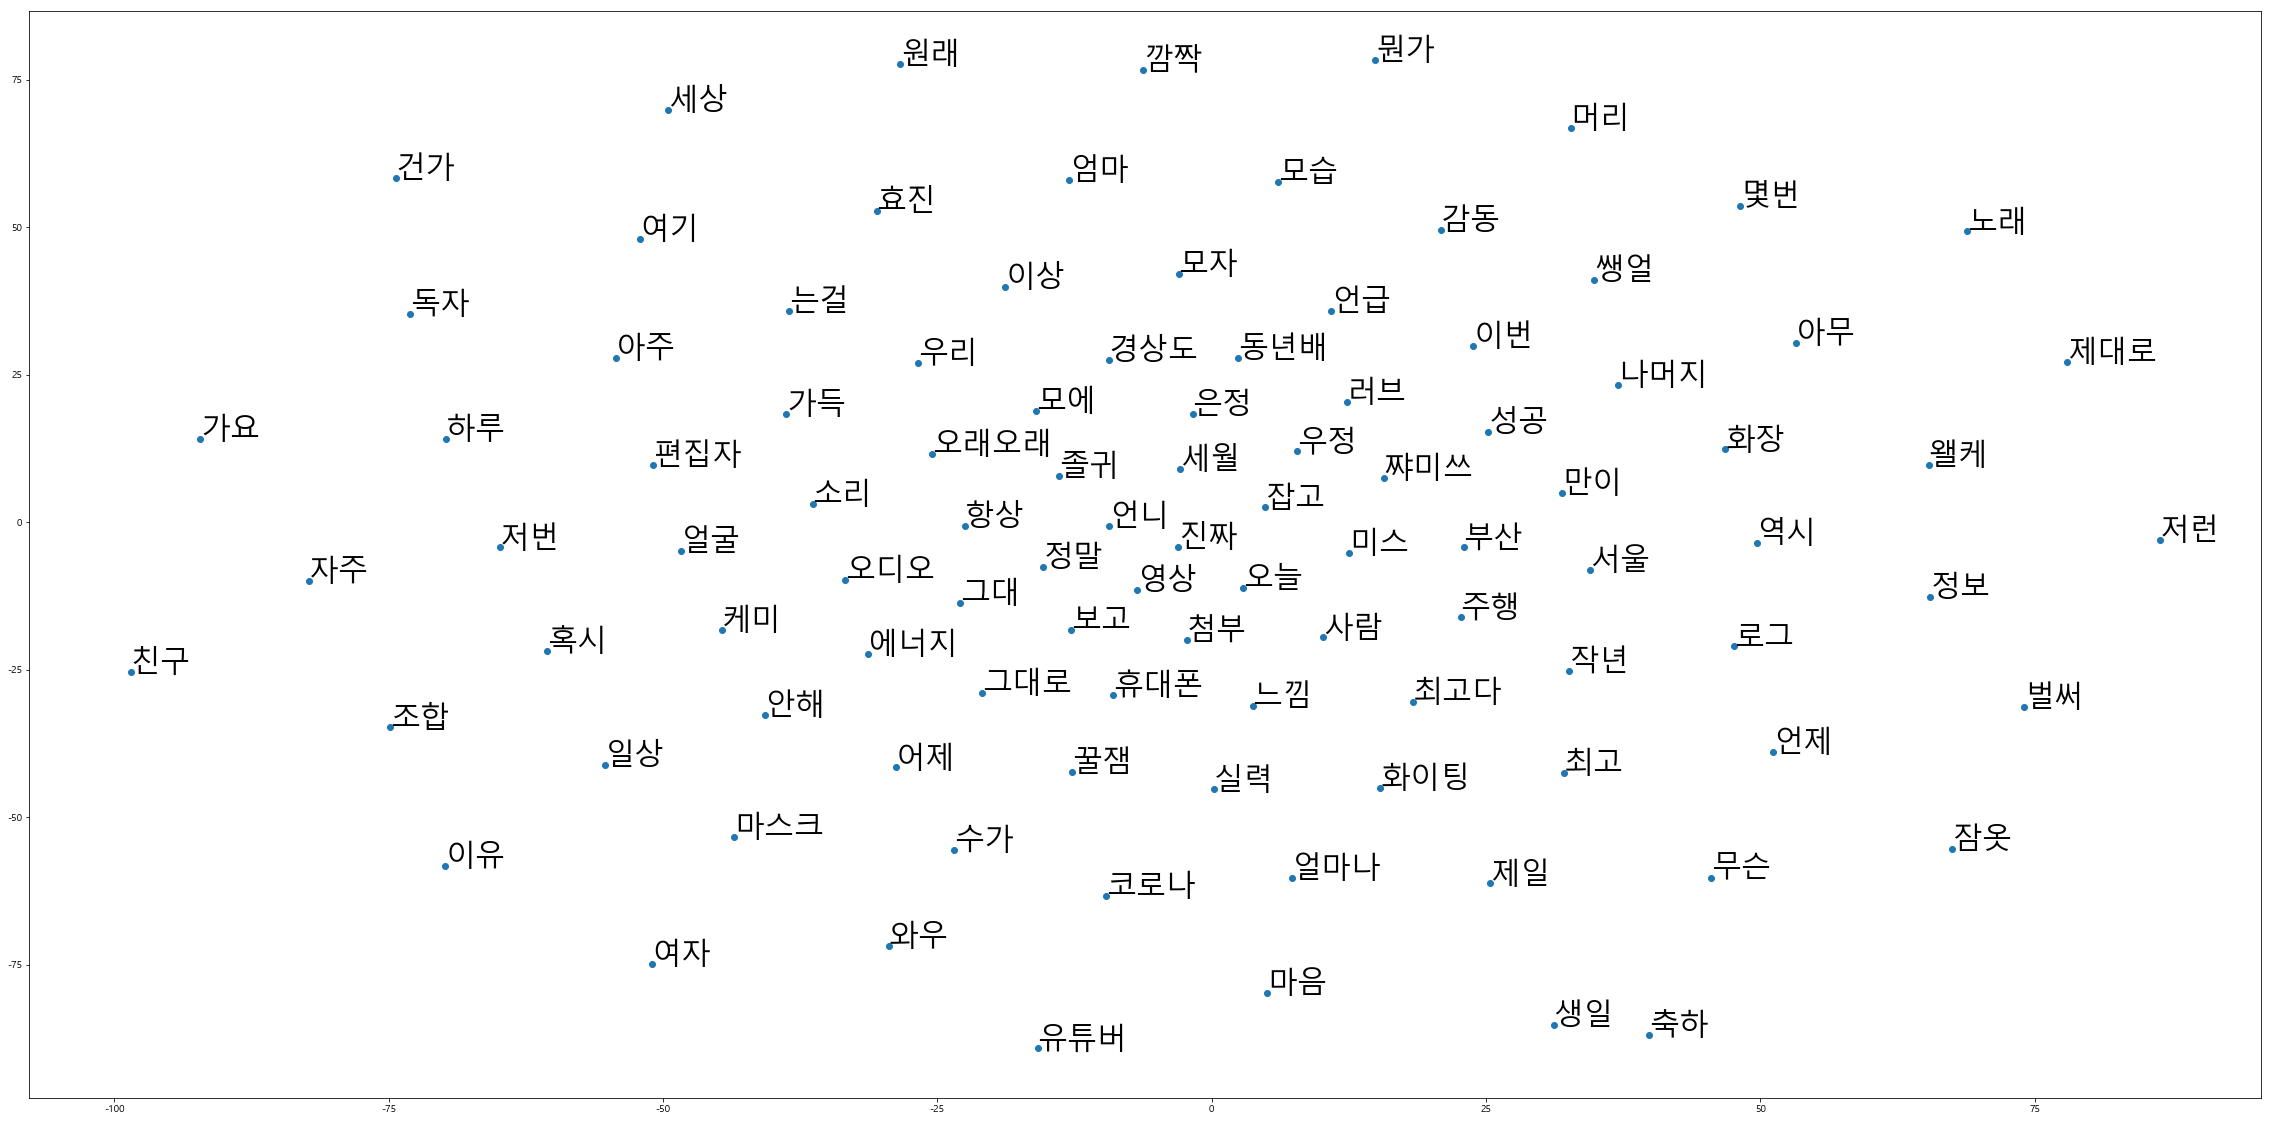

In [39]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()

In [40]:
# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:150,:])
# X_tsne = tsne.fit_transform(X)

In [41]:
df = pd.DataFrame(X_tsne, index=vocab[:150], columns=['x', 'y'])
df.shape

(150, 2)

In [42]:
df.head(10)

,x,y
편집자,45.920635,-14.542683
부산,-17.509146,-31.038952
오늘,-0.249541,-9.912951
서울,82.975815,27.959934
사람,46.078632,-31.675022
우리,-55.235226,-30.238693
동년배,-26.349264,19.828299
모자,24.316549,-121.520714
아주,100.729736,-80.812866
느낌,20.361286,-14.603549


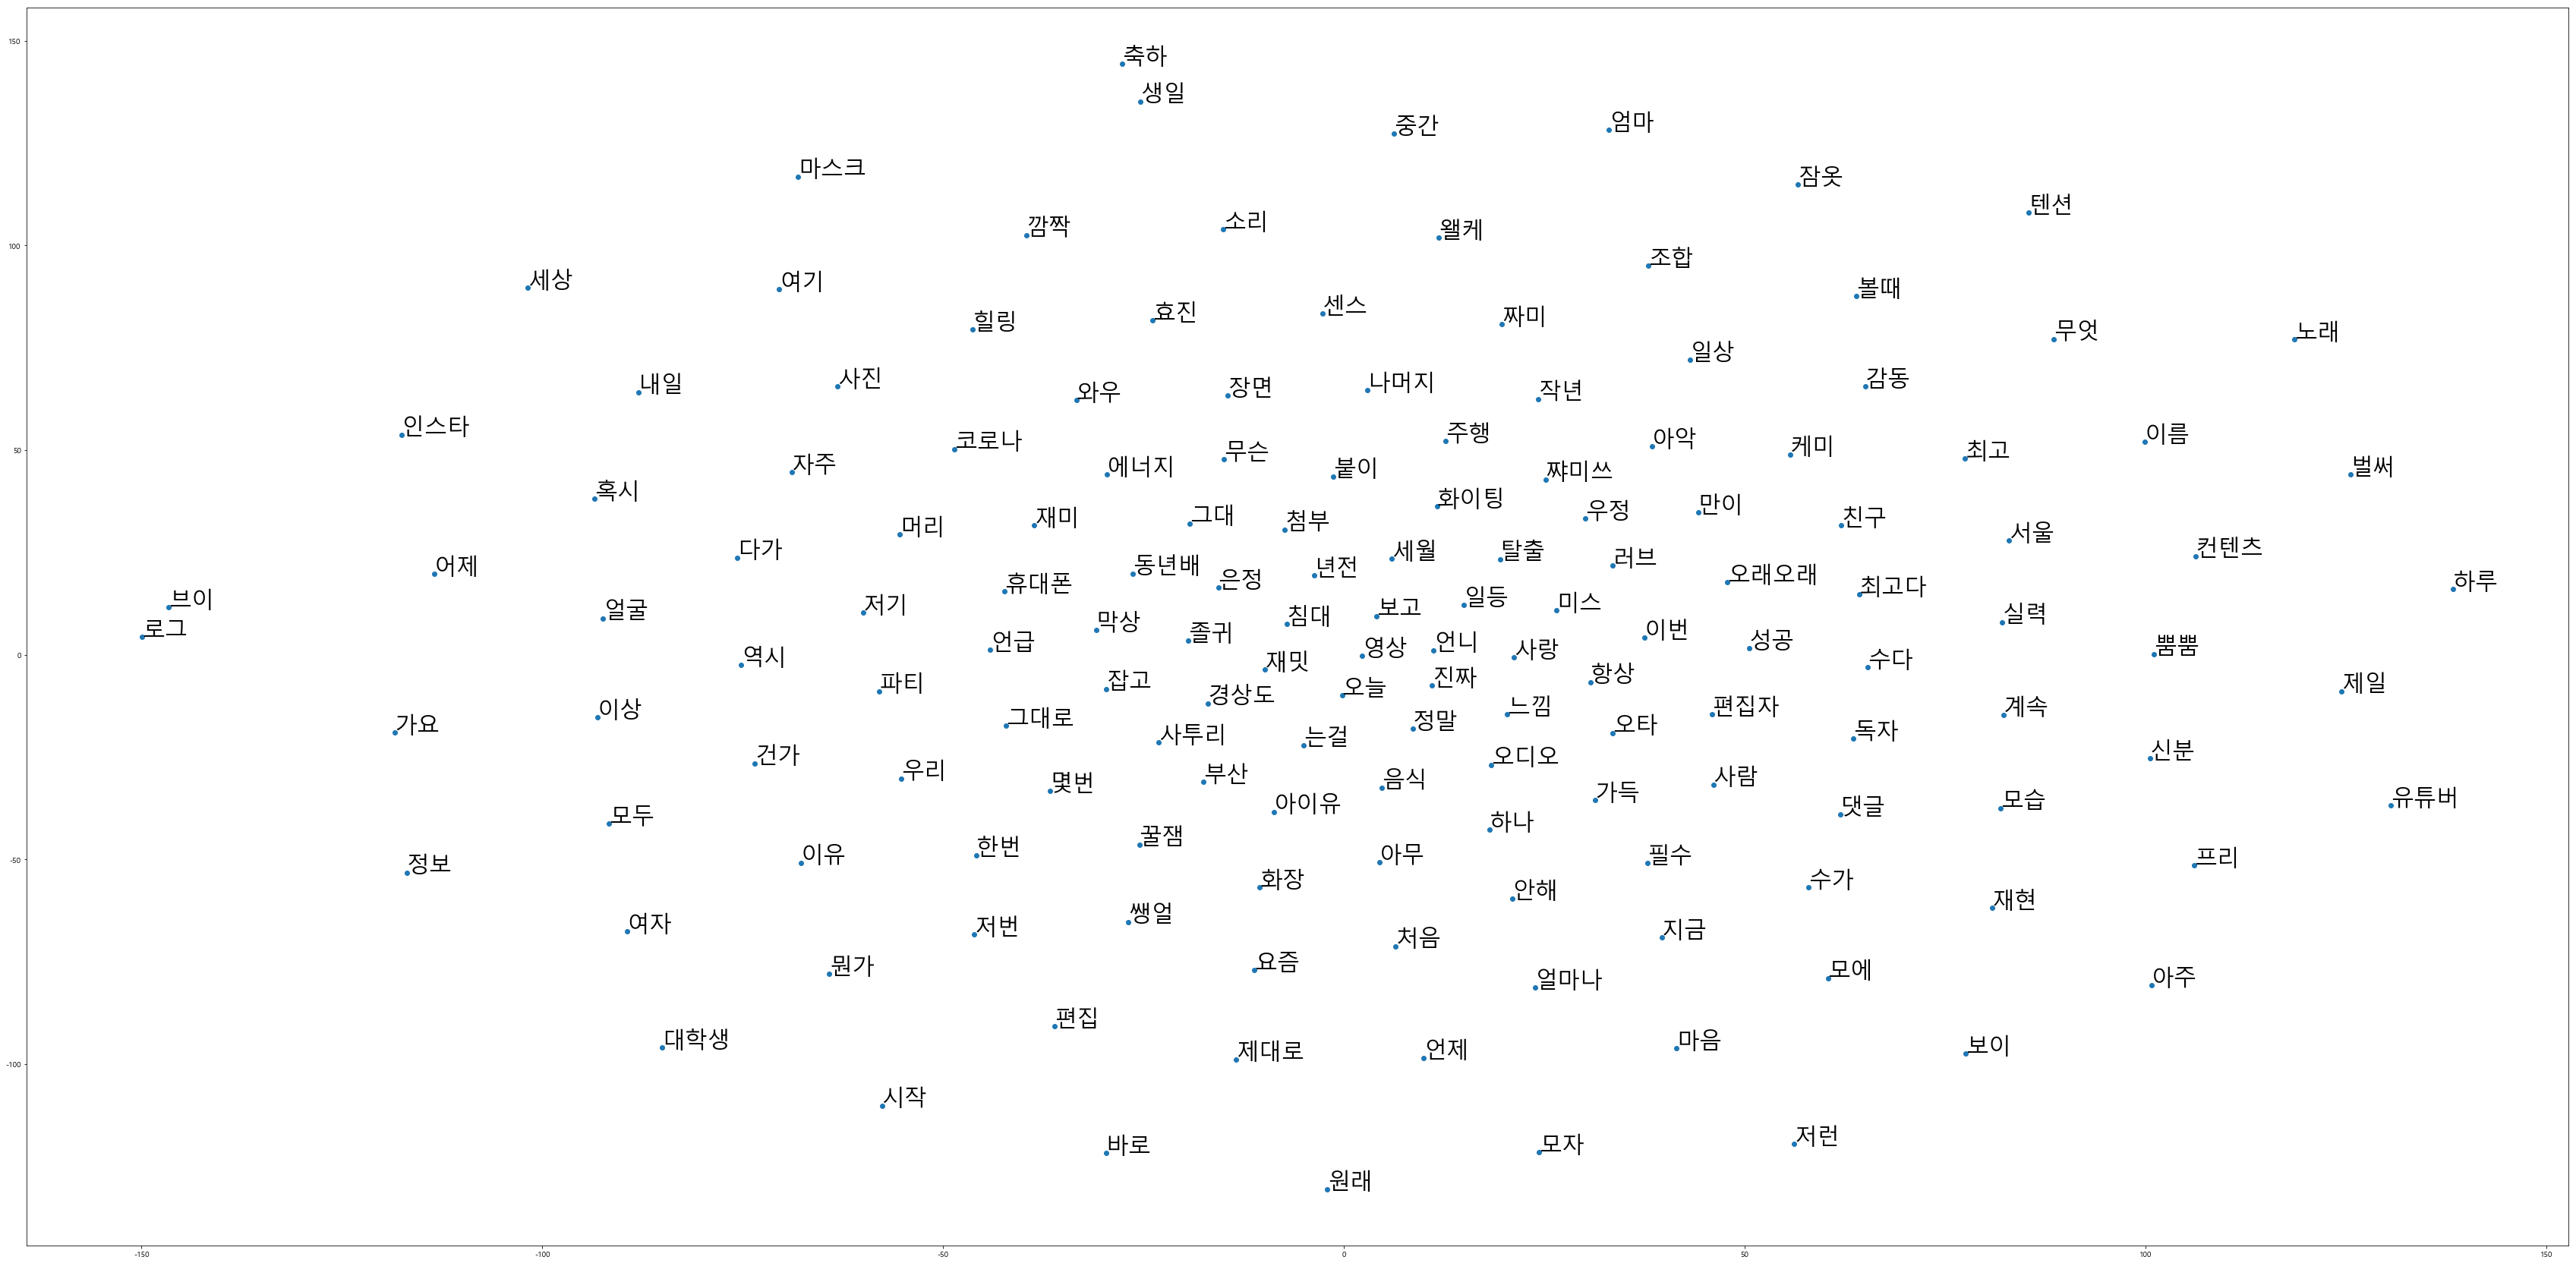

In [43]:
fig = plt.figure()
fig.set_size_inches(60, 30)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()